# Here be scripts for generating the figures in our cell labelling paper.

In [1]:
# It's dangerous to go alone, take these
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr
%matplotlib inline

#clustlist = ['gsea', 'gsva','ora','metaneighbor','adobo','sccatch','cibersort']
clustlist = ['GSEA', 'GSVA','ORA','MetaNeighbor','Adobo','scCATCH','CIBERSORT']
clustnames = ['gsea', 'gsva','ora','metaneighbor','adobo','sccatch','cibersort']
celllist =  ['LAmbDA',
             'Cell_BLAST',
             'RF',
             'kNN9',
             'ACTINN',
             'LDA',
             'LDArej',
             'CaSTLe',
             'scmapcluster',
             'SVM',
             'SingleCellNet',
             'scVI',
             'SVMrej',
             'scmapcell',
             'NMC',
             'singleR',
             'scID',
             'scPred',
             'CHETAH',
            ]

alg_rename = {key:item for key,item in zip(clustnames+celllist,clustlist+celllist)}
print(alg_rename)
dataset_rename = {'cb':'Chung',
                  'dg': 'Darmanis',
                  'jam': 'Jerby Arnon',
                  'li_crc': 'Li',
                  'llc': 'Lambrechts',
                  'peng': 'Peng',
                  'tm':'Tirosh',
                  'vg':'Van Galen',
                 }
dataset_rename = {'cb':'Breast',
                  'dg': 'Glioblastoma',
                  'jam': 'Melanoma',
                  'li_crc': 'Colorectal',
                  'llc': 'Lung',
                  'peng': 'Pancreatic',
                  'tm':'Metastatic Melanoma',
                  'vg':'AML',
                 }

def make_heatmap(infile, outfile, title, column, show_data=False):
    #read the result and set the index.
    result = pd.read_csv(infile, sep='\t')
    result
    hbs = result.reset_index()
    hbs.drop('index',axis=1, inplace=True)
    hbs.dataset = hbs.apply(lambda row: dataset_rename[row['dataset']], axis=1)
    hbs.algorithm = hbs.apply(lambda row: alg_rename[row['algorithm']], axis=1)
    
    #display the file if you want to make sure that it's loaded correctly
    if show_data:
        display(hbs)
    
    datasets = list(set(hbs.dataset))
    datasets = ['Li', 'Chung', 'Darmanis','Tirosh','Jerby Arnon','Van Galen','Lambrechts','Peng']
    methods = list(set(hbs.algorithm))
    # Make a dataframe of average f-measure for datasets and methods
    hmdf = pd.DataFrame(columns=datasets)
    for method in methods:
        #select only the rows for the current method and add them to the heatmap dataframe
        tempdf = hbs[hbs.algorithm == method].copy()
        datalist = []
        for dataset in datasets:
            datalist.append(tempdf[tempdf.dataset==dataset][column].mean())
        dataseries = pd.Series(datalist, index = hmdf.columns)
        hmdf = hmdf.append(dataseries,ignore_index=True)
    
    hmdf.index = methods
    
    #make a column of average values, sort by  that column, then save it in another variable and remove it.
    #hmdf['avg'] = hmdf.apply(lambda row: row.mean(), axis=1)
    hmdf['avg'] = hmdf.apply(lambda row: row.median(), axis=1) #MEDIAN INSTEAD OF MEAN
    if column == "VI":
        hmdf.sort_values(by='avg',ascending=True, inplace=True)
        colour =  sns.cubehelix_palette(start=2, rot=0, dark=0.1, light=.95, reverse=True, as_cmap=True)
    else:
        # sort by average and define a colourmap
        hmdf.sort_values(by='avg',ascending=False, inplace=True)
        colour =  sns.cubehelix_palette(start=2, rot=0, dark=0.1, light=.95, reverse=False, as_cmap=True)
        colour = sns.color_palette("Greens",as_cmap=True)
    avg_hm = hmdf[['avg']].copy()
    hmdf=hmdf[datasets]
    
    fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,gridspec_kw={'width_ratios': [1, 10]})
    
    # Old blue colour, might end up using green for the barplots
    # create heatmaps, rightplot is all the datasets, leftplot is the avg bar
    if column == "VI":
        rightplot = sns.heatmap(hmdf, vmin=0, vmax=4, annot=True, cmap=colour, ax=ax2, yticklabels=False)
        leftplot = sns.heatmap(avg_hm, vmin=0, vmax=4, annot=True, cmap=colour, ax=ax1, cbar=False, yticklabels=True)
    else:
        rightplot = sns.heatmap(hmdf, vmin=0, vmax=1, annot=True, cmap=colour, ax=ax2, yticklabels=False)
        leftplot = sns.heatmap(avg_hm, vmin=0, vmax=1, annot=True, cmap=colour, ax=ax1, cbar=False, yticklabels=True)
    rightplot.set_facecolor('silver')
    leftplot.set_facecolor('silver')
    rightplot.set_xticklabels(rightplot.get_xticklabels(),
                              rotation=45,
                              horizontalalignment='right')
    #leftplot.set_xticklabels(['Average'],
    leftplot.set_xticklabels(['Median'],
                             rotation=45,
                             horizontalalignment='right')
    fig.set_figheight(10)
    for i in leftplot.get_yticklabels():
        if i.get_text() in clustlist:
            i.set_color('brown')
    plt.gca().set_title(title)
    plt.savefig(outfile, bbox_inches = 'tight', dpi=500)

{'gsea': 'GSEA', 'gsva': 'GSVA', 'ora': 'ORA', 'metaneighbor': 'MetaNeighbor', 'adobo': 'Adobo', 'sccatch': 'scCATCH', 'cibersort': 'CIBERSORT', 'LAmbDA': 'LAmbDA', 'Cell_BLAST': 'Cell_BLAST', 'RF': 'RF', 'kNN9': 'kNN9', 'ACTINN': 'ACTINN', 'LDA': 'LDA', 'LDArej': 'LDArej', 'CaSTLe': 'CaSTLe', 'scmapcluster': 'scmapcluster', 'SVM': 'SVM', 'SingleCellNet': 'SingleCellNet', 'scVI': 'scVI', 'SVMrej': 'SVMrej', 'scmapcell': 'scmapcell', 'NMC': 'NMC', 'singleR': 'singleR', 'scID': 'scID', 'scPred': 'scPred', 'CHETAH': 'CHETAH'}


In [2]:
bigdf = pd.read_csv("performance/seurat/bigdf.tsv", sep='\t')
bigdf['category'] = bigdf.apply(lambda row: 'Malignant' if row['category']=='Tumour'\
                                  else row['category'], axis=1)
display(bigdf)

,method,class,precision,recall,f1_score,support,specificity,Cell Labels,category,dataset
0,cibersort,BCELL,0.197917,0.463415,0.277372,82,0.618812,BCELL,Immune,Breast
1,cibersort,MYELOID,0.000000,0.000000,0.000000,32,0.834802,MYELOID,Immune,Breast
2,cibersort,STROMAL,0.193182,0.809524,0.311927,21,0.847312,STROMAL,Stromal,Breast
3,cibersort,TCELL,0.244275,0.941176,0.387879,34,0.780973,TCELL,Immune,Breast
4,cibersort,TUMOR,0.000000,0.000000,0.000000,317,1.000000,TUMOR,Malignant,Breast
...,...,...,...,...,...,...,...,...,...,...
1793,singleR,GMP_LIKE,0.600583,0.744905,0.665004,3042,0.920227,GMP_LIKE,Malignant,AML
1794,singleR,HSC_PROG,0.815497,0.823686,0.819571,3386,0.965978,HSC_PROG,Stem/Progenitor,AML
1795,singleR,HSC_PROG_LIKE,0.920434,0.714286,0.804361,6300,0.975117,HSC_PROG_LIKE,Malignant,AML
1796,singleR,MYELOID,0.693795,0.810825,0.747759,3806,0.924863,MYELOID,Immune,AML


In [3]:
# read in the rdata file from her script
# the f-measure mean here is higher than taking the average f1_score across cell types for the 
# same method and dataset in my classification report....
    # i'm using sklearn.metrics.classification_report: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    
    # this is different because i did not use a weighted avg for the f-measure
    
#result = pyreadr.read_r('Rdata/F-Measure-Bootstrap-Ensemble-without-pint.Rdata')
#result = pd.read_csv('Rdata/F-Measure-Bootstrap-Ensemble.tsv', sep='\t')
result = pd.read_csv('Rdata/F-Measure-Bootstrap-Ensemble.tsv', sep='\t')
result
#bs = result['df']
bs = result.reset_index()
bs.drop('index',axis=1, inplace=True)
bs['F.Low']=bs['F.Mean']-bs['F.Low']
bs['F.High']=bs['F.High']-bs['F.Mean']
bs['Rec.Low']=bs['Rec.Mean']-bs['Rec.Low']
bs['Rec.High']=bs['Rec.High']-bs['Rec.Mean']
bs['Prec.Low']=bs['Prec.Mean']-bs['Prec.Low']
bs['Prec.High']=bs['Prec.High']-bs['Prec.Mean']
bs.dataset = bs.apply(lambda row: dataset_rename[row['dataset']], axis=1)
display(bs)

,Unnamed: 0,name,dataset,algorithm,F.Mean,F.Low,F.High,Rec.Mean,Rec.Low,Rec.High,Prec.Mean,Prec.Low,Prec.High,Rank,score
0,x,cb-cibersort,Breast,cibersort,0.09,0.02,0.02,0.18,0.03,0.03,0.06,0.02,0.02,23,23.0
1,x.1,cb-gsea,Breast,gsea,0.06,0.01,0.03,0.14,0.03,0.04,0.04,0.01,0.02,22,25.5
2,x.2,cb-gsva,Breast,gsva,0.11,0.02,0.03,0.18,0.03,0.03,0.10,0.03,0.03,19,22.0
3,x.3,cb-metaneighbor,Breast,metaneighbor,0.08,0.02,0.03,0.18,0.04,0.03,0.06,0.02,0.02,24,24.0
4,x.4,cb-ora,Breast,ora,0.06,0.02,0.03,0.14,0.03,0.04,0.04,0.01,0.02,18,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,x.203,vg-CHETAH,AML,CHETAH,0.67,0.00,0.01,0.57,0.00,0.01,0.83,0.00,0.01,14,15.0
204,x.204,vg-scID,AML,scID,0.41,0.01,0.01,0.34,0.01,0.01,0.63,0.01,0.00,20,21.0
205,x.205,vg-scmapcell,AML,scmapcell,0.66,0.00,0.01,0.52,0.00,0.01,0.90,0.00,0.01,15,16.0
206,x.206,vg-scmapcluster,AML,scmapcluster,0.55,0.01,0.01,0.44,0.01,0.00,0.82,0.00,0.01,21,20.0


# Average F-measure of algorithms

In [4]:
# select the rows, group by algorithm, sort them by the F measure, and save the index as a list
algs = bs[bs.algorithm.isin(celllist+clustlist)].copy()
algs = algs.groupby(['algorithm']).mean()
algs = algs.sort_values('F.Mean',ascending=False)
alglist = algs.index.to_list()
#alglist

# Modify Parisa's f-measure plot

In [21]:
# make a dictionary of the ranked colours
color_order = sns.cubehelix_palette(n_colors=26, start=.5, rot=-.4, reverse=True) #blue
color_order = sns.cubehelix_palette(n_colors=26, start=2, rot=0, reverse=True) #green
color_order = sns.color_palette("Greens_r",n_colors=26)
alg_order = [
         'SVM',
         'ACTINN',
         'SingleCellNet',
         'scVI',
         'SVMrej',
         'CaSTLe',
         'singleR',
         'RF',
         'LDA',
         'LDArej',
         'LAmbDA',
         'CHETAH',
         'kNN9',
         'scmapcell',
         'NMC',
         'scPred',
         'Cell_BLAST',
         'ora', 
         'gsva', 
         'scID',
         'scmapcluster',
         'gsea',
         'cibersort',
         'metaneighbor',
         'adobo',
         'sccatch',
        ]
color_dict = {}
for (key, value) in zip(alg_order,color_order):
    color_dict[key]=value
 

In [22]:
def bootstrapped_ci_bars(df, title):
    bootstrapped = df[df.dataset==title]
    bootstrapped = bootstrapped.sort_values(by='F.Mean', axis=0, ascending=False)
    fig = sns.barplot(data=bootstrapped, 
                      y='algorithm', 
                      x='F.Mean',
                      xerr=bootstrapped[['F.Low', 'F.High']].T.values,
                     )
    # recolour the bars according to their rank.
    for (bar, ticktext) in zip(fig.patches, fig.get_yticklabels()):
        #print(color_dict[ticktext.get_text()])
        bar.set_color(color_dict[ticktext.get_text()])
        if ticktext.get_text() in clustlist:
            ticktext.set_color('brown')
    fig.set_title(title)
    fig.set_xlabel('F-Measure')
    fig.set_ylabel('Algorithm')
    cbar = plt.colorbar(plt.cm.ScalarMappable(#cmap=sns.cubehelix_palette(n_colors=26, start=2, rot=0, reverse=True, as_cmap=True), 
                                              cmap=sns.color_palette("Greens_r",n_colors=26,as_cmap=True),
                                              norm=plt.Normalize(1,26)))
    cbar.set_label('Rank')
    plt.savefig(f'supplemental/Figure_S3/{title}_ci_barplot.png',bbox_inches='tight', dpi=500)
    return fig

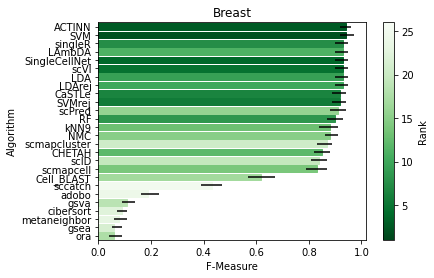

In [23]:
fig = bootstrapped_ci_bars(bs, 'Breast')

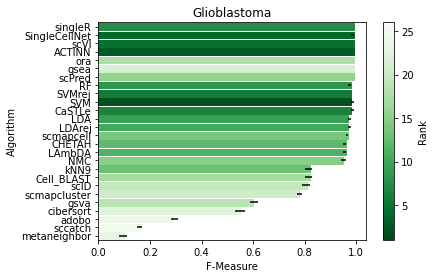

In [24]:
fig = bootstrapped_ci_bars(bs, 'Glioblastoma')

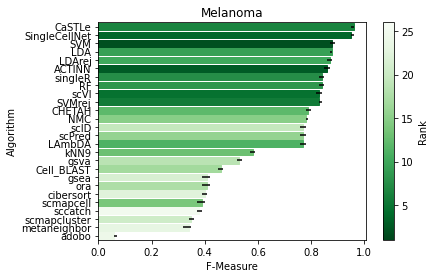

In [25]:
fig = bootstrapped_ci_bars(bs, 'Melanoma')

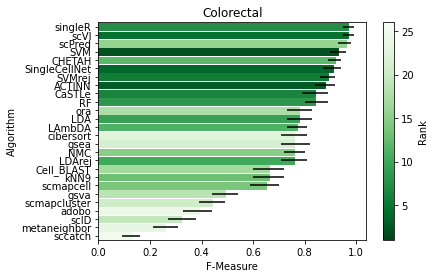

In [26]:
fig = bootstrapped_ci_bars(bs, 'Colorectal')

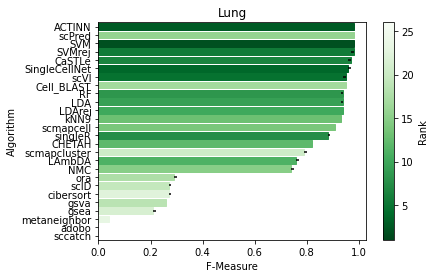

In [27]:
fig = bootstrapped_ci_bars(bs, 'Lung')

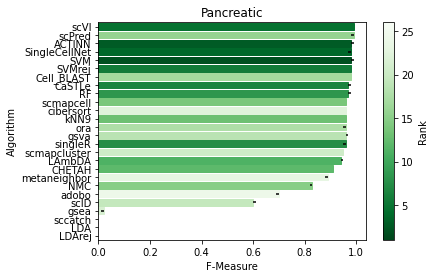

In [28]:
fig = bootstrapped_ci_bars(bs, 'Pancreatic')

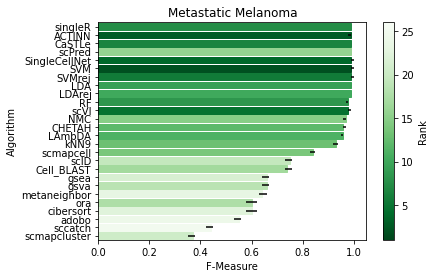

In [29]:
fig = bootstrapped_ci_bars(bs, 'Metastatic Melanoma')

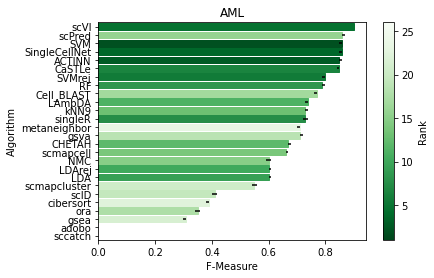

In [30]:
fig = bootstrapped_ci_bars(bs, 'AML')

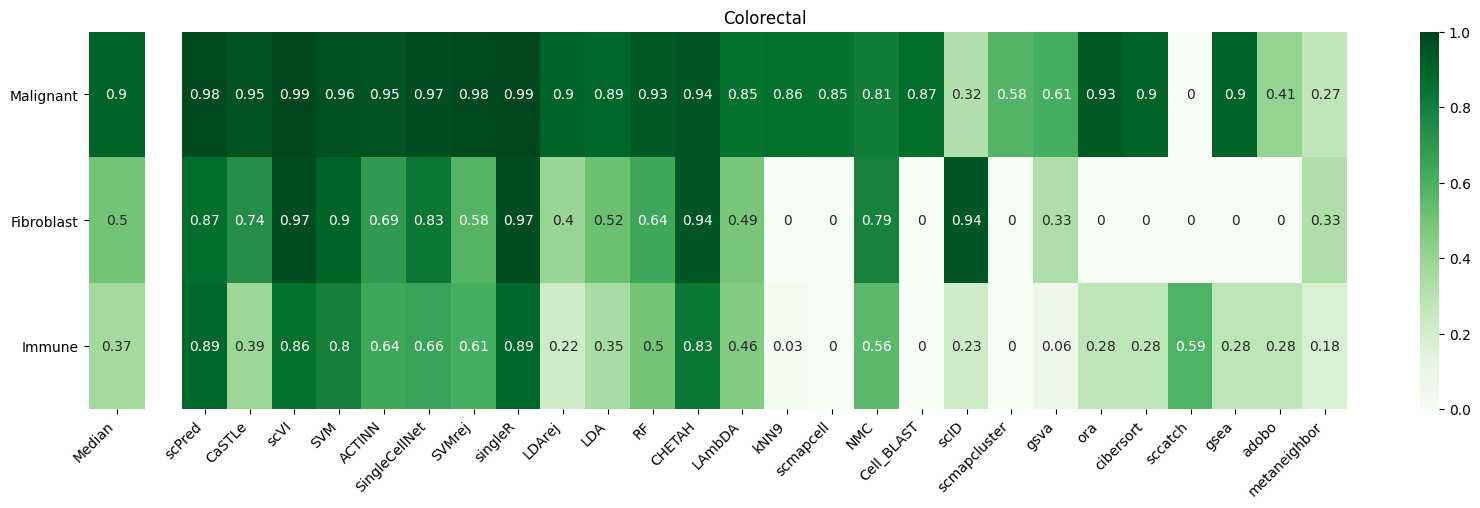

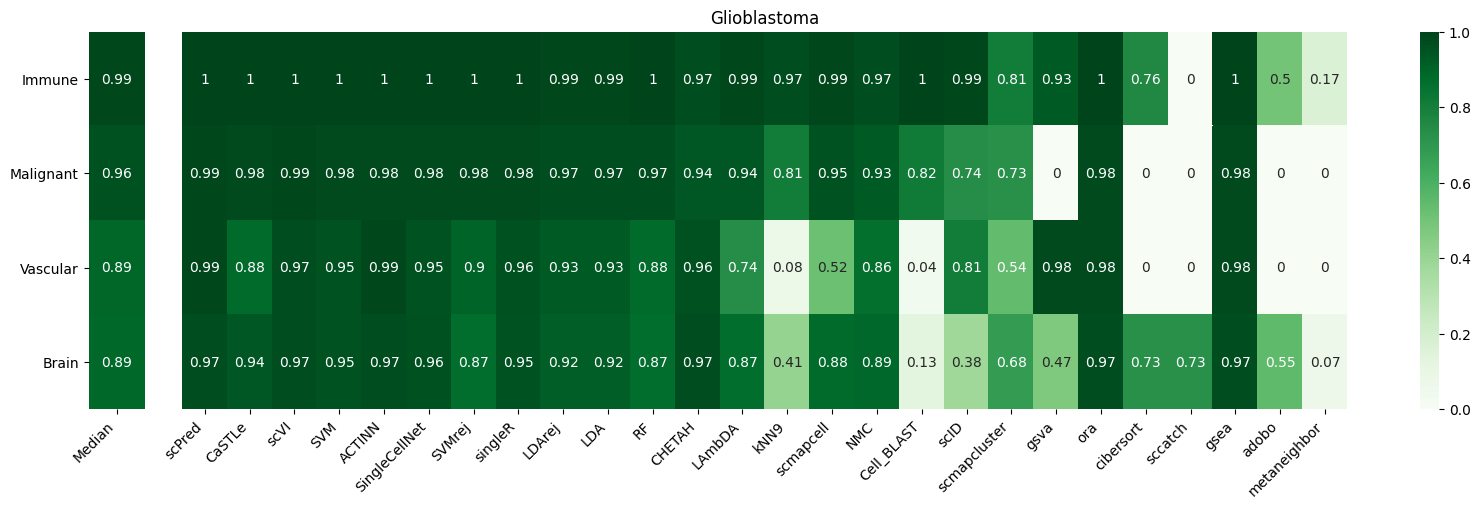

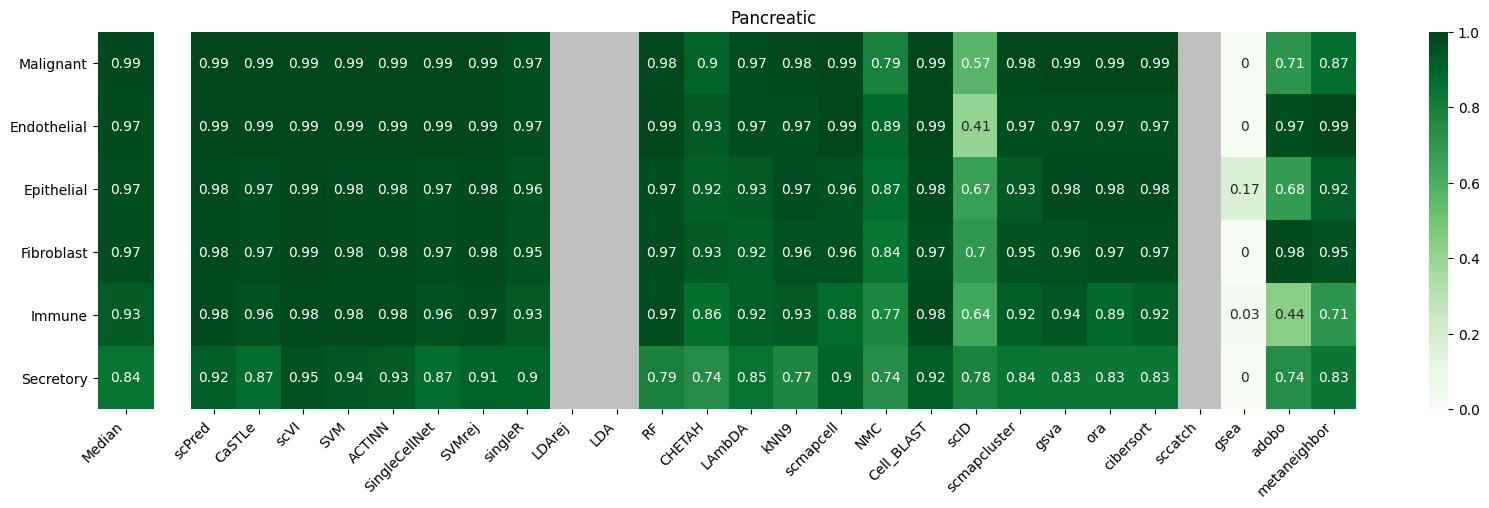

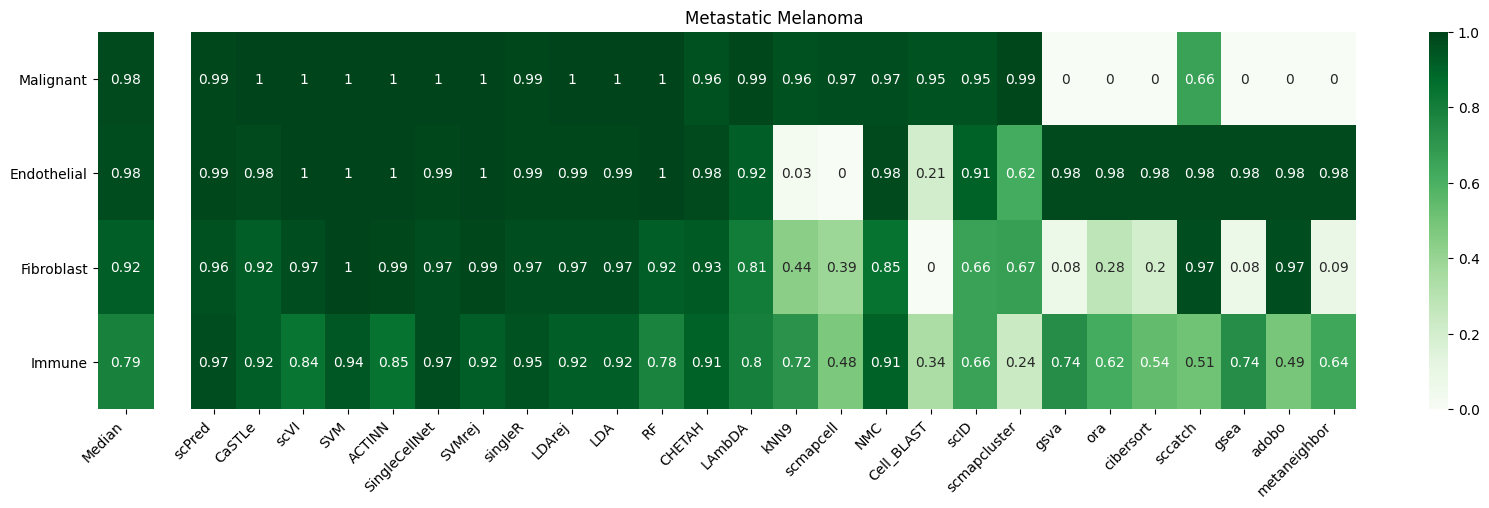

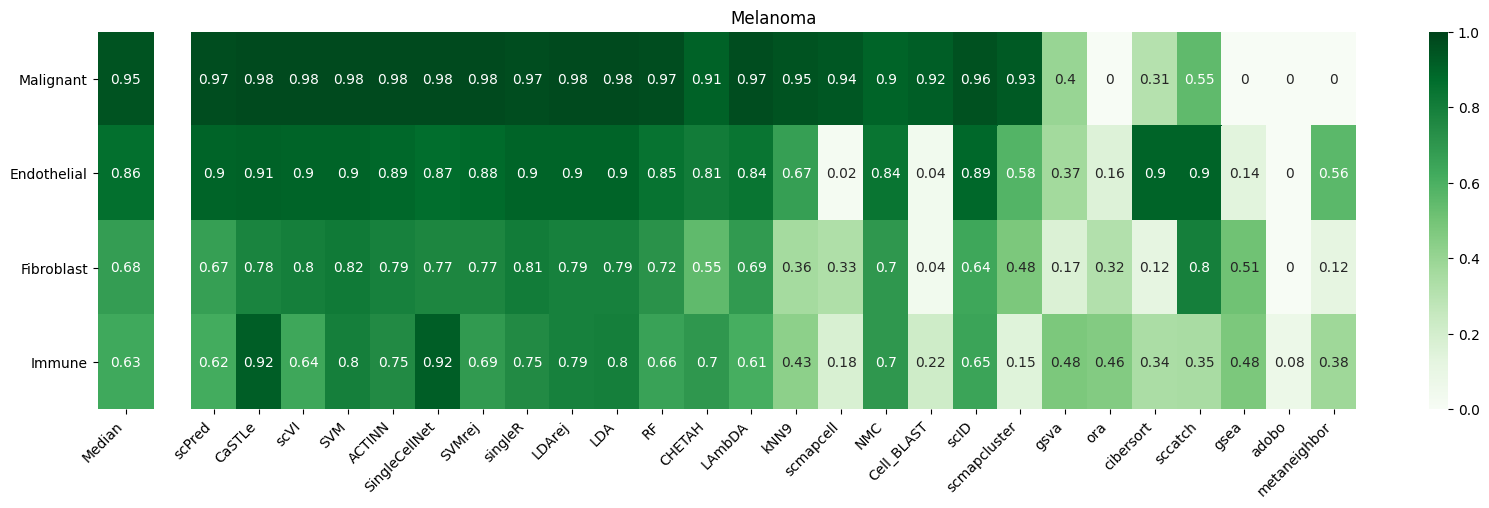

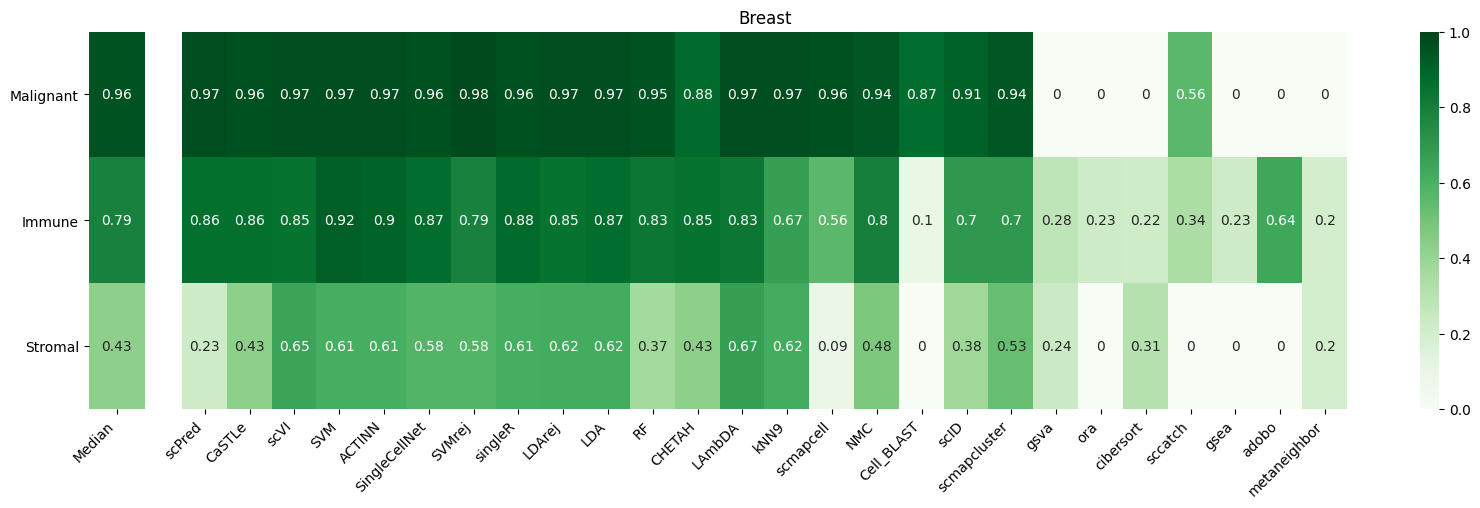

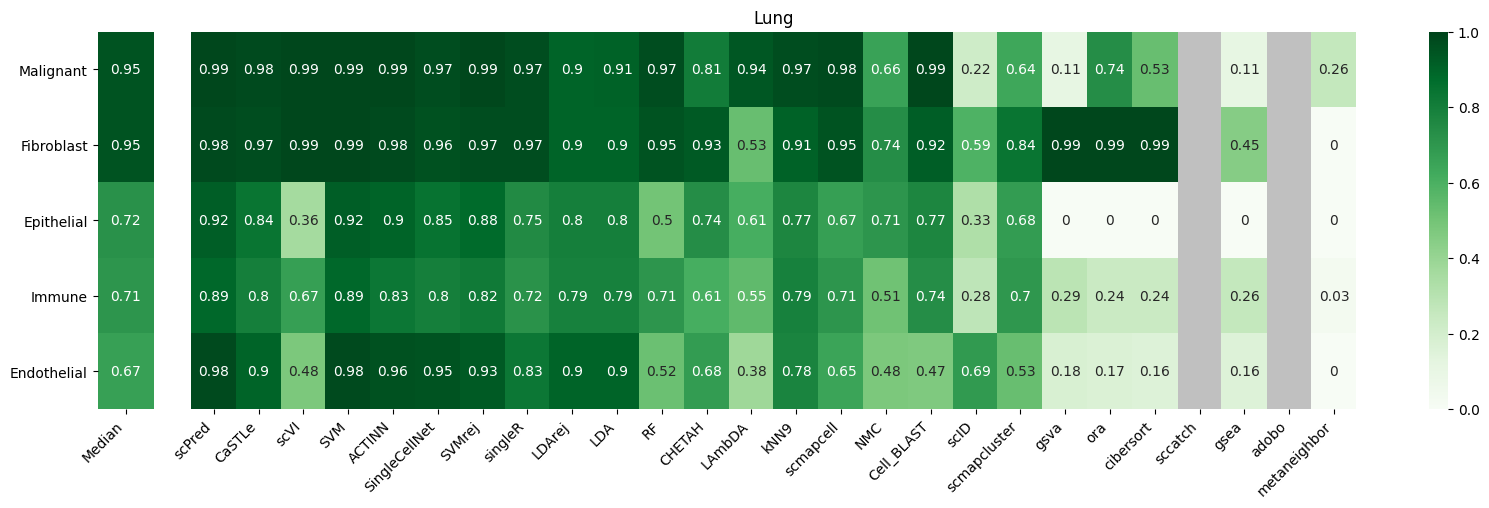

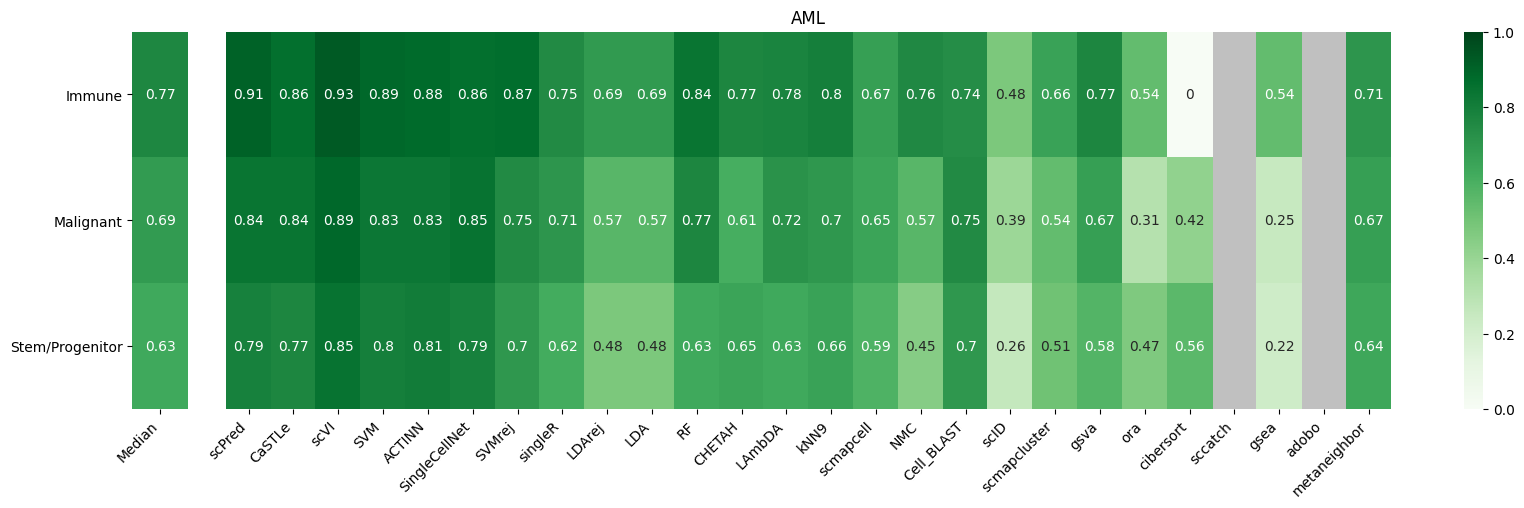

In [31]:
categories = list(set(bigdf.category))
methods = list(set(bigdf.method))
methods = [
         'scPred',
         'CaSTLe',
         'scVI',
         'SVM',
         'ACTINN',
         'SingleCellNet',
         'SVMrej',
         'singleR',
         'LDArej',
         'LDA',
         'RF',
         'CHETAH',
         'LAmbDA',
         'kNN9',
         'scmapcell',
         'NMC',
         'Cell_BLAST',
         'scID',
         'scmapcluster',
         'gsva', 
         'ora', 
         'cibersort',
         'sccatch',
         'gsea',
         'adobo',
         'metaneighbor',
        ]
datasets = list(set(bigdf.dataset))
median_hm = pd.DataFrame()
median_hm['category'] = categories[1:]
median_hm.set_index('category', inplace=True)
bigdf = bigdf.sort_values(by='support',ascending=False)
# Make a dataframe of average f-measure for datasets and methods
for dataset in datasets:
    hmdf = pd.DataFrame(columns=categories)
    tempdf = bigdf[bigdf.dataset == dataset].copy()
    for method in methods:
        mdf = tempdf[tempdf.method==method].copy()
        datalist = []
        for category in categories:
            datalist.append(mdf[mdf.category==category]['f1_score'].mean())
        dataseries = pd.Series(datalist, index = hmdf.columns)
        hmdf = hmdf.append(dataseries,ignore_index=True)

    hmdf.index = methods
    #hmdf=hmdf.drop(hmdf.columns[0], 1)
    hmdf = hmdf.dropna(axis=1, how='all')
    if dataset == 'vg':
        hmdf = hmdf.dropna(axis=0)
    hmdf = hmdf.T
    
    #make a column of average values, sort by  that column, then save it in another variable and remove it.
    #hmdf['avg'] = hmdf.apply(lambda row: row.mean(), axis=1)
    hmdf['avg'] = hmdf.apply(lambda row: row.median(), axis=1)
    hmdf.sort_values(by='avg',ascending=False, inplace=True)
    avg_hm = hmdf[['avg']].copy()
    hmdf=hmdf.drop('avg', 1)
    hmdf = hmdf.round(2)
    fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,gridspec_kw={'width_ratios': [1, 26]})
    #fig, (ax1, ax2) = plt.subplots(2,1,dpi=500,gridspec_kw={'height_ratios': [1, 26]})
    #colour = sns.cubehelix_palette(start=.5, rot=-.4, as_cmap=True)
    colour =  sns.cubehelix_palette(start=2, rot=0, dark=0.1, light=.95, reverse=False, as_cmap=True)
    colour = sns.color_palette("Greens",as_cmap=True)
    rightplot = sns.heatmap(hmdf, 
                            vmin=0, 
                            vmax=1, 
                            annot=True, 
                            #annot_kws={'rotation':'vertical'},
                            cmap=colour, 
                            ax=ax2, 
                            yticklabels=False,
                            xticklabels=True
                            #square=True
                           )
    rightplot.set_xticklabels(rightplot.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right')
    leftplot = sns.heatmap(avg_hm, 
                           vmin=0, 
                           vmax=1, 
                           annot=True, 
                           cmap=colour, 
                           ax=ax1, 
                           cbar=False, 
                           #square=True
                          )
    #leftplot.set_xticklabels(['Average'],
    leftplot.set_xticklabels(['Median'],
                        rotation=45,
                        horizontalalignment='right')
    leftplot.set_yticklabels(leftplot.get_yticklabels(),rotation=0)
    rightplot.set_facecolor('silver')
    leftplot.set_facecolor('silver')

    
    #TODO figure out how to make the heights the same, looks bad rn
    #fig.set_figheight(15)
    for i in ax2.get_xticklabels():
        if i.get_text() in clustlist:
            i.set_color('brown')
    fig.set_figwidth(20)
    fig.set_figheight(5)
    plt.subplots_adjust(wspace=0.05)
    plt.gca().set_title(dataset)
    outfile = f'supplemental/category/{dataset}_catmap.png'
    outfile = outfile.replace(" ", "_")
    plt.savefig(outfile,bbox_inches='tight', dpi=500, transparent=False)
    plt.show()
    median_hm[dataset] = avg_hm['avg']

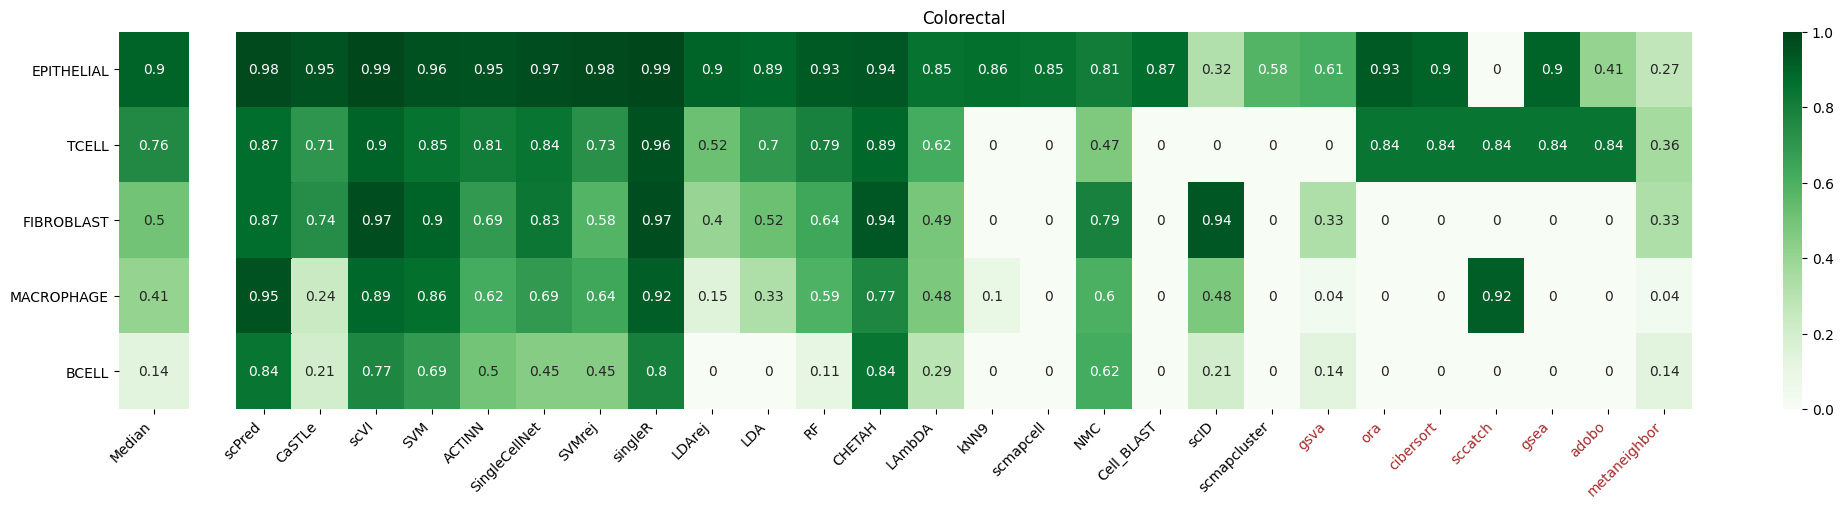

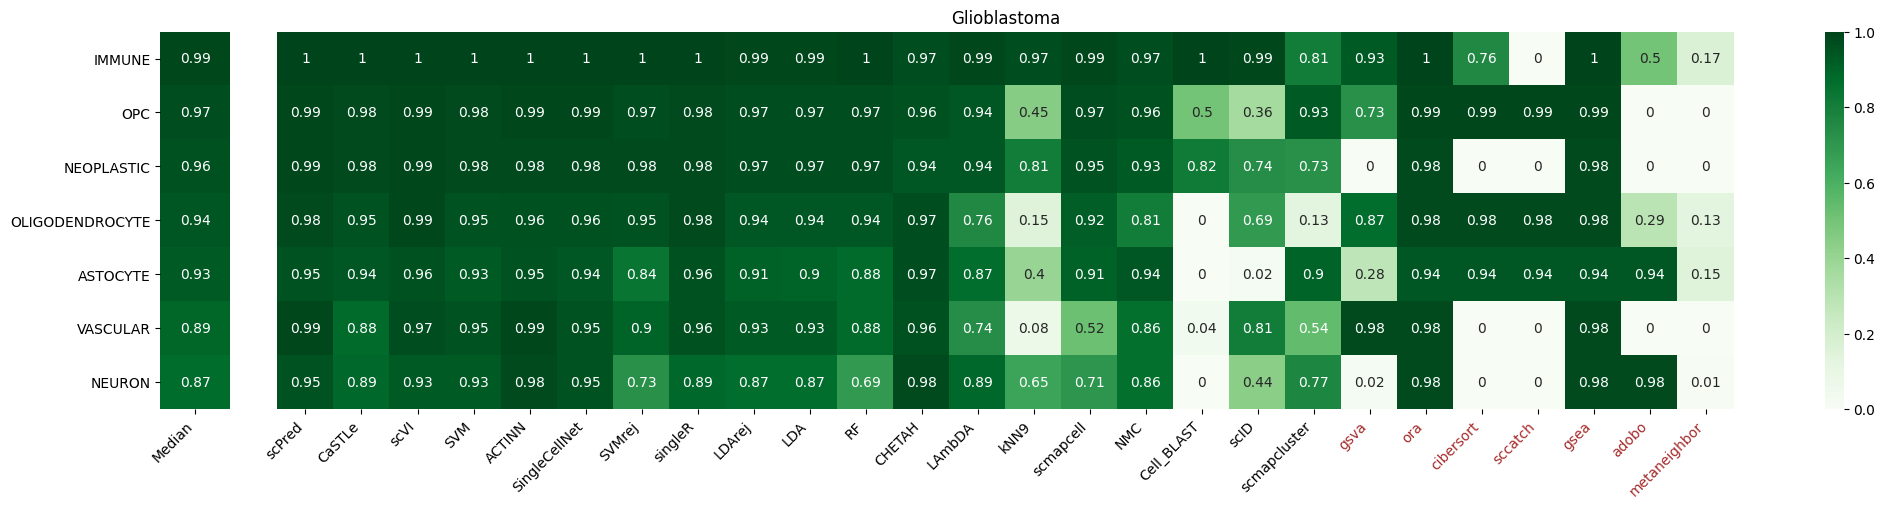

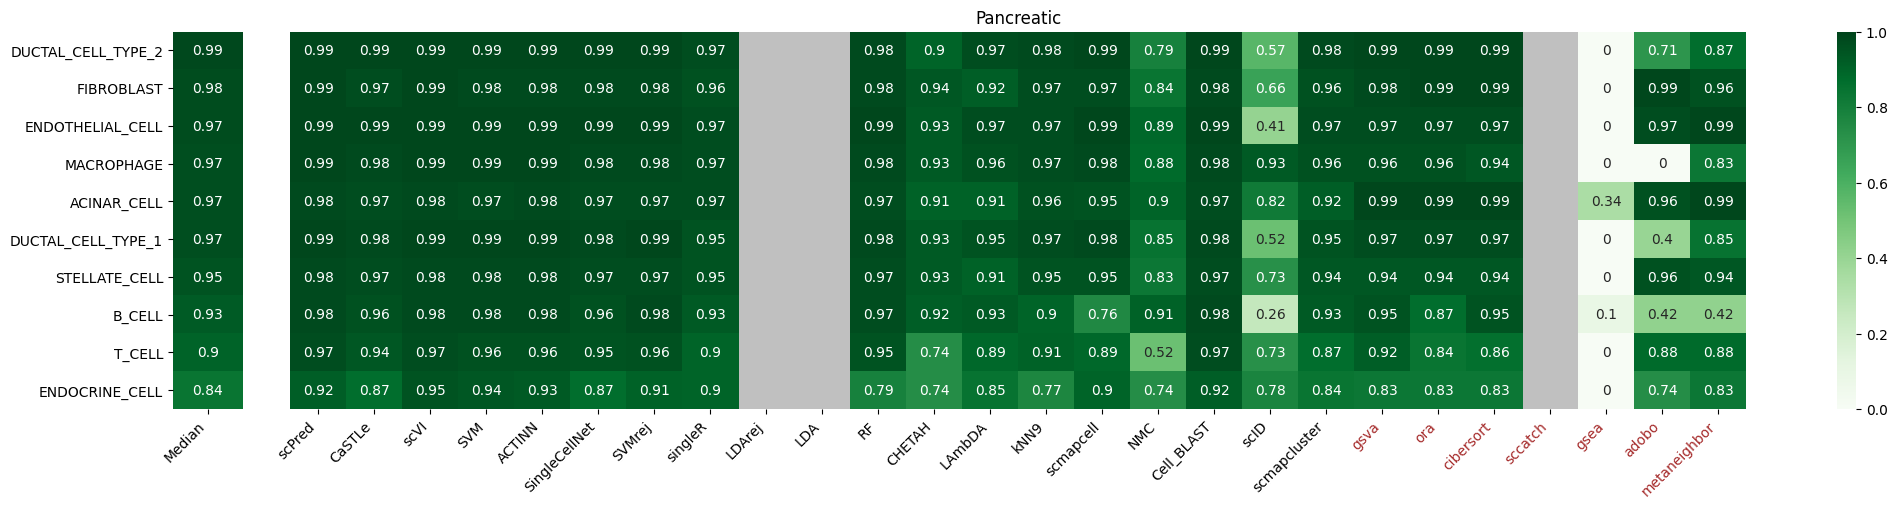

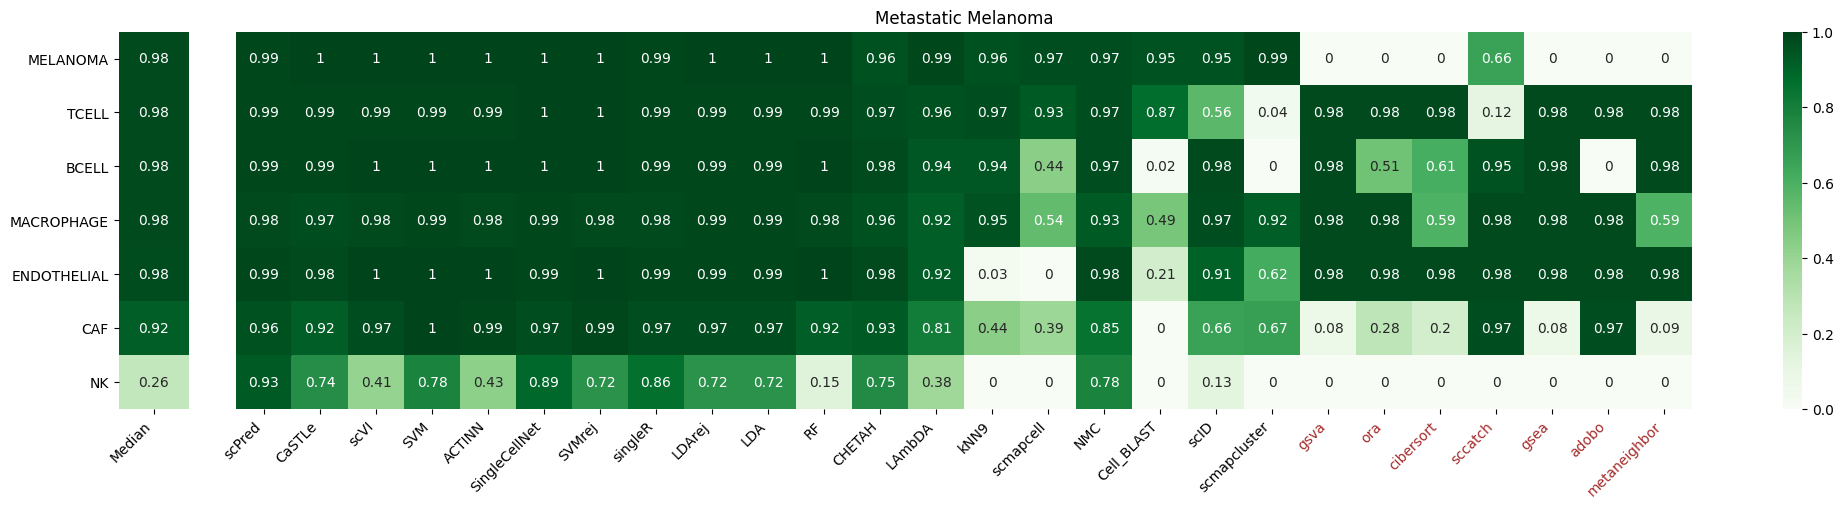

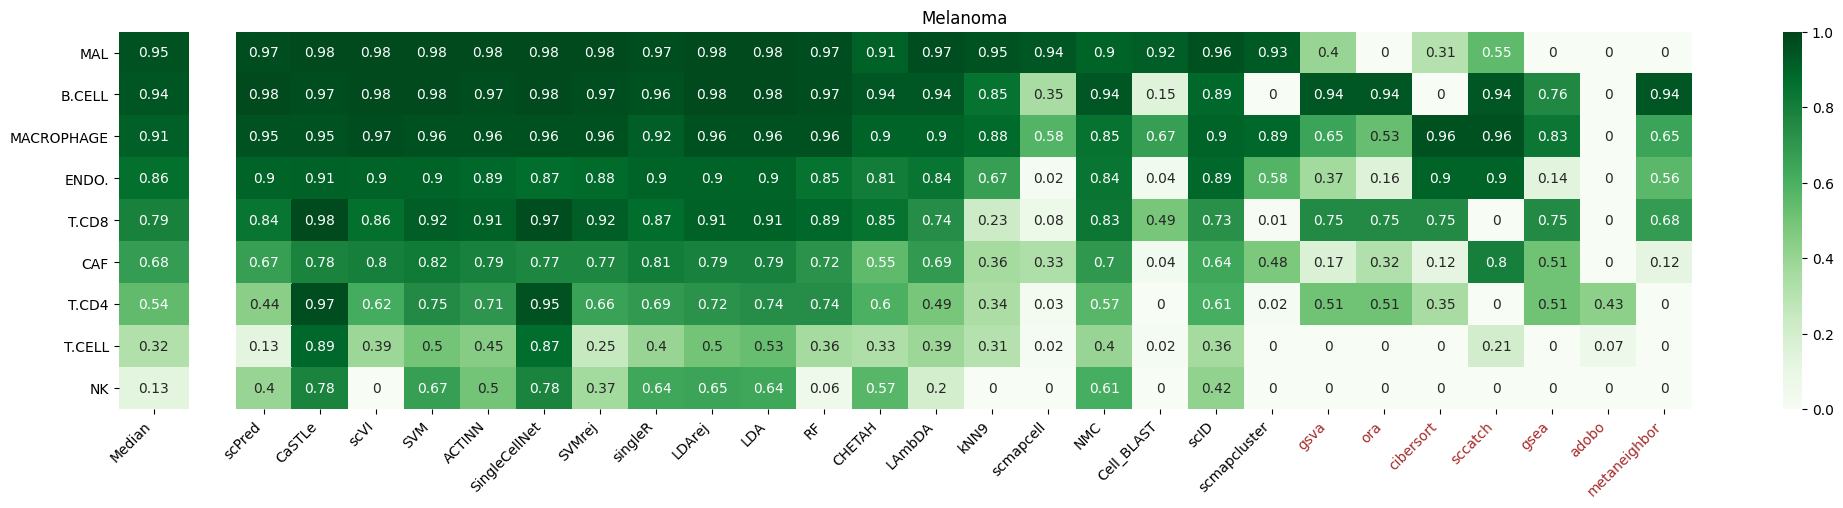

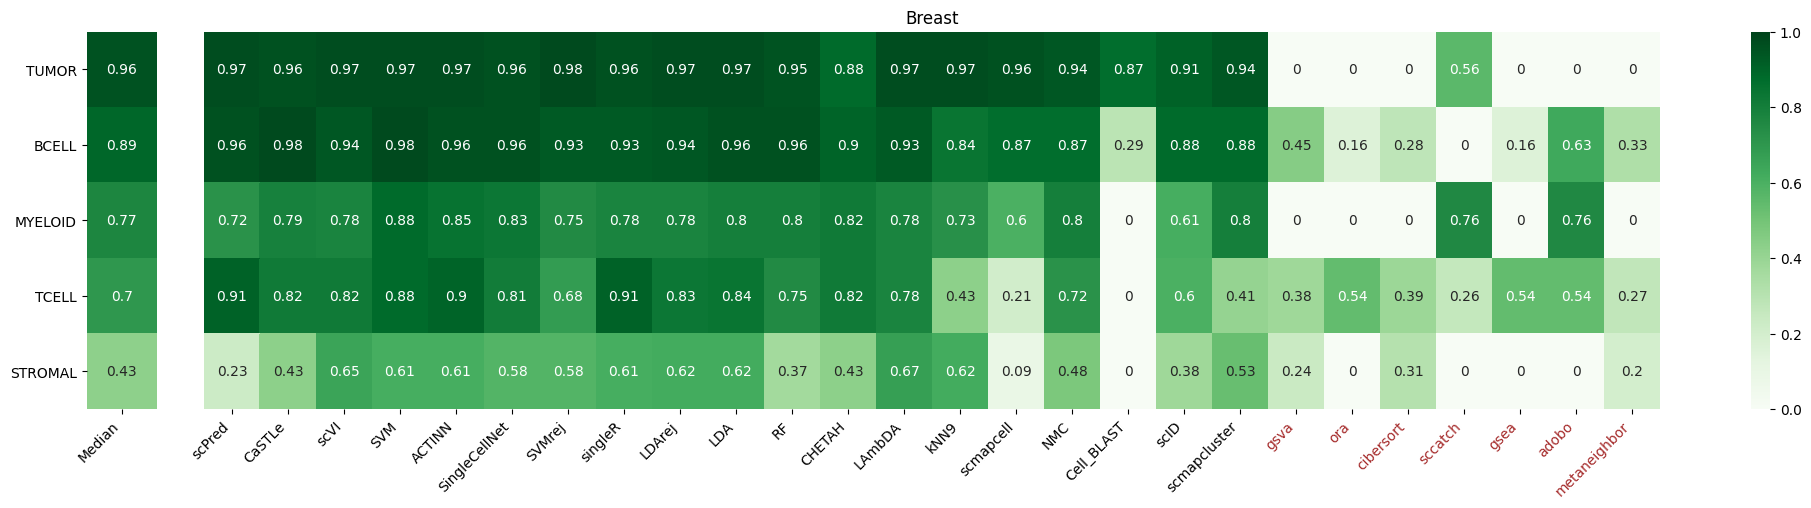

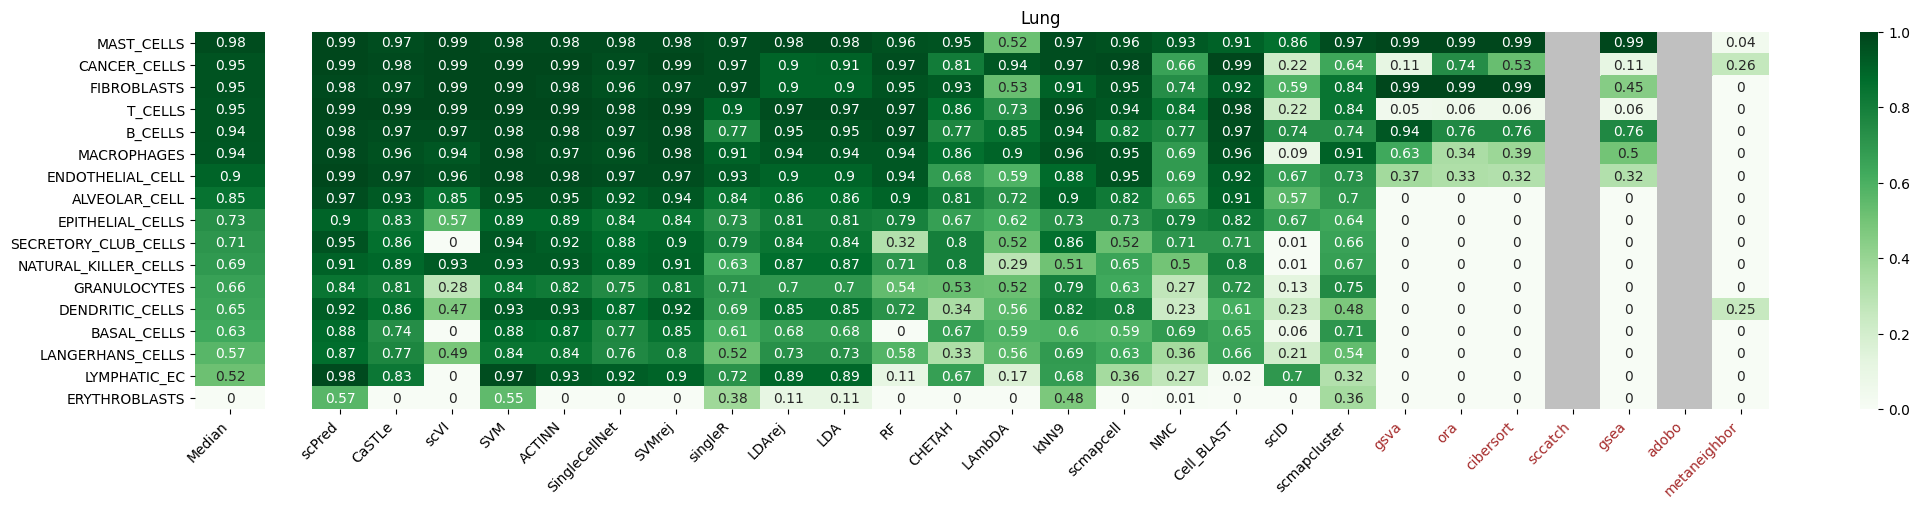

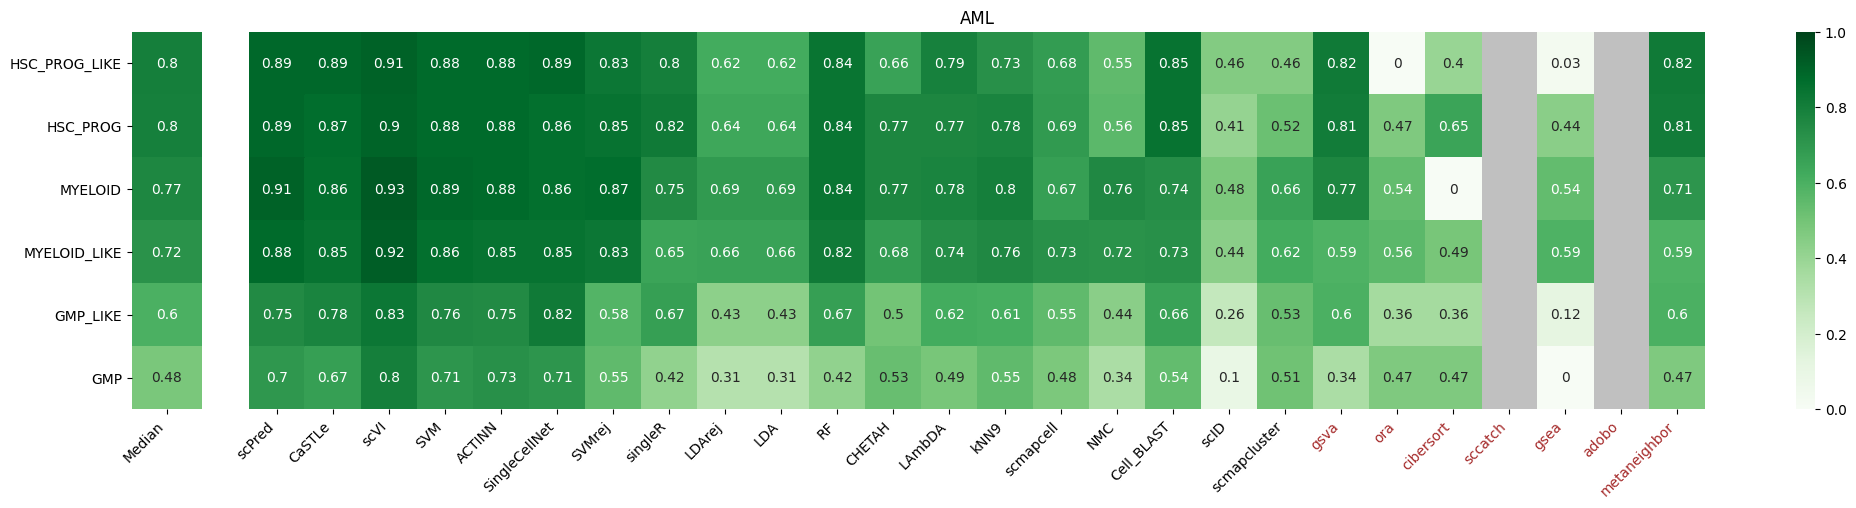

In [32]:
categories = list(set(bigdf.category))
celltypes = list(set(bigdf["class"]))
methods = list(set(bigdf.method))
methods = [
         'scPred',
         'CaSTLe',
         'scVI',
         'SVM',
         'ACTINN',
         'SingleCellNet',
         'SVMrej',
         'singleR',
         'LDArej',
         'LDA',
         'RF',
         'CHETAH',
         'LAmbDA',
         'kNN9',
         'scmapcell',
         'NMC',
         'Cell_BLAST',
         'scID',
         'scmapcluster',
         'gsva', 
         'ora', 
         'cibersort',
         'sccatch',
         'gsea',
         'adobo',
         'metaneighbor',
        ]
celltypes.remove('UNLABELED')
celltypes.remove('Unknown')
celltypes.remove('UNKNOWN')

datasets = list(set(bigdf.dataset))
median_hm2 = pd.DataFrame()
median_hm2['category'] = celltypes
median_hm2.set_index('category', inplace=True)
# Make a dataframe of average f-measure for datasets and methods
for dataset in datasets:
    hmdf = pd.DataFrame(columns=celltypes)
    tempdf = bigdf[bigdf.dataset == dataset].copy()
    for method in methods:
        mdf = tempdf[tempdf.method==method].copy()
        datalist = []
        for category in celltypes:
            datalist.append(mdf[mdf["class"]==category]['f1_score'].mean())
        dataseries = pd.Series(datalist, index = hmdf.columns)
        hmdf = hmdf.append(dataseries,ignore_index=True)

    hmdf.index = methods
    #hmdf=hmdf.drop(hmdf.columns[0], 1)
    hmdf = hmdf.dropna(axis=1, how='all')
    if dataset == 'vg':
        hmdf = hmdf.dropna(axis=0)
    hmdf = hmdf.T
    
    #make a column of average values, sort by  that column, then save it in another variable and remove it.
    #hmdf['avg'] = hmdf.apply(lambda row: row.mean(), axis=1)
    hmdf['avg'] = hmdf.apply(lambda row: row.median(), axis=1)
    hmdf.sort_values(by='avg',ascending=False, inplace=True)
    avg_hm = hmdf[['avg']].copy()
    hmdf=hmdf.drop('avg', 1)
    hmdf = hmdf.round(2)
    fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,gridspec_kw={'width_ratios': [1, 26]})
    #fig, (ax1, ax2) = plt.subplots(2,1,dpi=500,gridspec_kw={'height_ratios': [1, 26]})
    #colour = sns.cubehelix_palette(start=.5, rot=-.4, as_cmap=True)
    colour =  sns.cubehelix_palette(start=2, rot=0, dark=0.1, light=.95, reverse=False, as_cmap=True)
    colour = sns.color_palette("Greens",as_cmap=True)
    rightplot = sns.heatmap(hmdf, 
                            vmin=0, 
                            vmax=1, 
                            annot=True, 
                            #annot_kws={'rotation':'vertical'},
                            cmap=colour, 
                            ax=ax2, 
                            yticklabels=False,
                            xticklabels=True
                            #square=True
                           )
    rightplot.set_xticklabels(rightplot.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right')
    leftplot = sns.heatmap(avg_hm, 
                           vmin=0, 
                           vmax=1, 
                           annot=True, 
                           cmap=colour, 
                           ax=ax1, 
                           cbar=False, 
                           #square=True
                          )
    #leftplot.set_xticklabels(['Average'],
    leftplot.set_xticklabels(['Median'],
                        rotation=45,
                        horizontalalignment='right')
    leftplot.set_yticklabels(leftplot.get_yticklabels(),rotation=0)
    rightplot.set_facecolor('silver')
    leftplot.set_facecolor('silver')

    
    #TODO figure out how to make the heights the same, looks bad rn
    #fig.set_figheight(15)
    for i in ax2.get_xticklabels():
        if i.get_text() in clustnames:
            i.set_color('brown')
    fig.set_figwidth(25)
    fig.set_figheight(5)
    plt.subplots_adjust(wspace=0.05)
    plt.gca().set_title(dataset)
    outfile = f'supplemental/celltype/{dataset}_catmap.png'
    outfile = outfile.replace(" ", "_")
    plt.savefig(outfile,bbox_inches='tight', dpi=500,transparent=False)
    plt.show()
    if dataset == 'Melanoma':
        hmdf.to_csv('melanoma_celltype_heatmap.csv')
    median_hm2[dataset] = avg_hm['avg']

55


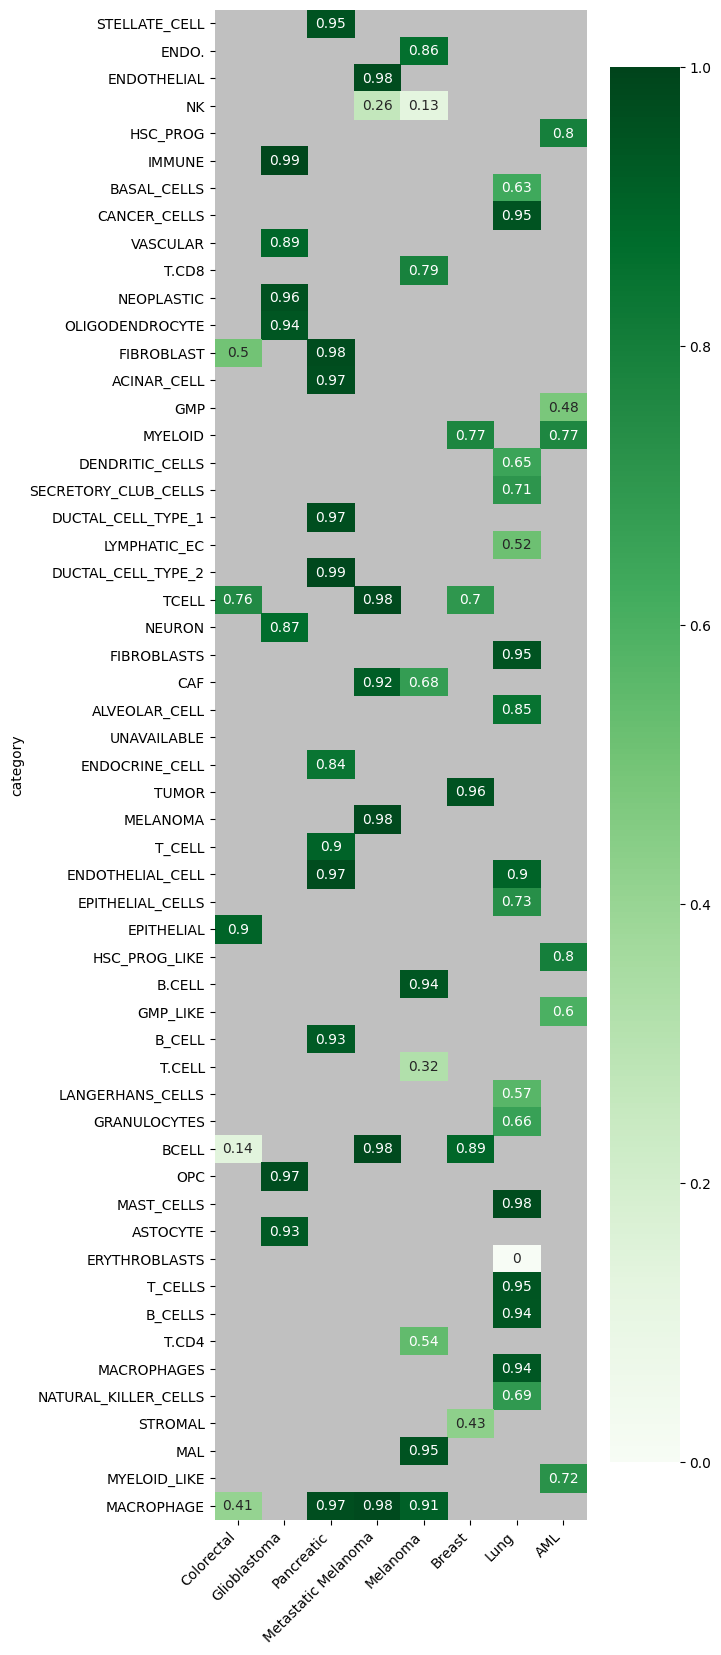

In [33]:
fig, (ax1) = plt.subplots(1,1,dpi=100)
plot = sns.heatmap(median_hm2, vmin=0, vmax=1, annot=True, cmap=colour, ax=ax1,yticklabels=True,xticklabels=True)
plot.set_facecolor('silver')
plot.set_xticklabels(plot.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right')
plot.set_yticklabels(plot.get_yticklabels(),rotation=0)
fig.set_figwidth(6)
fig.set_figheight(20)
plt.savefig("supplemental/median_dataset_v_celltype.png",bbox_inches='tight', dpi=500, transparent=False)

print(len(celltypes))

./subsampling_all_cells/performance/Darmanis_GBM_200.tsv
./subsampling_all_cells/performance/Lambrechts_LC_100.tsv
./subsampling_all_cells/performance/Peng_PC_800.tsv
./subsampling_all_cells/performance/vanGalan_AML_400.tsv
./subsampling_all_cells/performance/JA_Melanoma_100.tsv
./subsampling_all_cells/performance/Darmanis_GBM_400.tsv
./subsampling_all_cells/performance/Tirosh_Melanoma_50.tsv
./subsampling_all_cells/performance/vanGalan_AML_200.tsv
./subsampling_all_cells/performance/JA_Melanoma_400.tsv
./subsampling_all_cells/performance/Darmanis_GBM_100.tsv
./subsampling_all_cells/performance/Lambrechts_LC_200.tsv
./subsampling_all_cells/performance/Peng_PC_50.tsv
./subsampling_all_cells/performance/JA_Melanoma_200.tsv
./subsampling_all_cells/performance/vanGalan_AML_100.tsv
./subsampling_all_cells/performance/Lambrechts_LC_400.tsv
./subsampling_all_cells/performance/Darmanis_GBM_50.tsv
./subsampling_all_cells/performance/Lambrechts_LC_800.tsv
./subsampling_all_cells/performance/Peng

,method,class,precision,recall,f1_score,support,specificity,cellprop,dataset
0,SVM,NEURON,1.000000,1.00000,1.000000,200.0,1.000000,0.142857,balanced
1,kNN9,NEURON,0.653595,1.00000,0.790514,200.0,0.911667,0.142857,balanced
2,scVI,NEURON,1.000000,1.00000,1.000000,200.0,1.000000,0.142857,balanced
3,RF,NEURON,1.000000,1.00000,1.000000,200.0,1.000000,0.142857,balanced
4,ACTINN,NEURON,1.000000,1.00000,1.000000,200.0,1.000000,0.142857,balanced
...,...,...,...,...,...,...,...,...,...
4698,scVI,HSC_PROG_LIKE,0.842945,0.85875,0.850774,800.0,0.968000,0.166667,balanced
4699,SVMrej,HSC_PROG_LIKE,0.923792,0.62125,0.742900,800.0,0.989750,0.166667,balanced
4700,singleR,HSC_PROG_LIKE,0.850679,0.70500,0.771018,800.0,0.975250,0.166667,balanced
4701,NMC,HSC_PROG_LIKE,0.726058,0.40750,0.522018,800.0,0.969250,0.166667,balanced


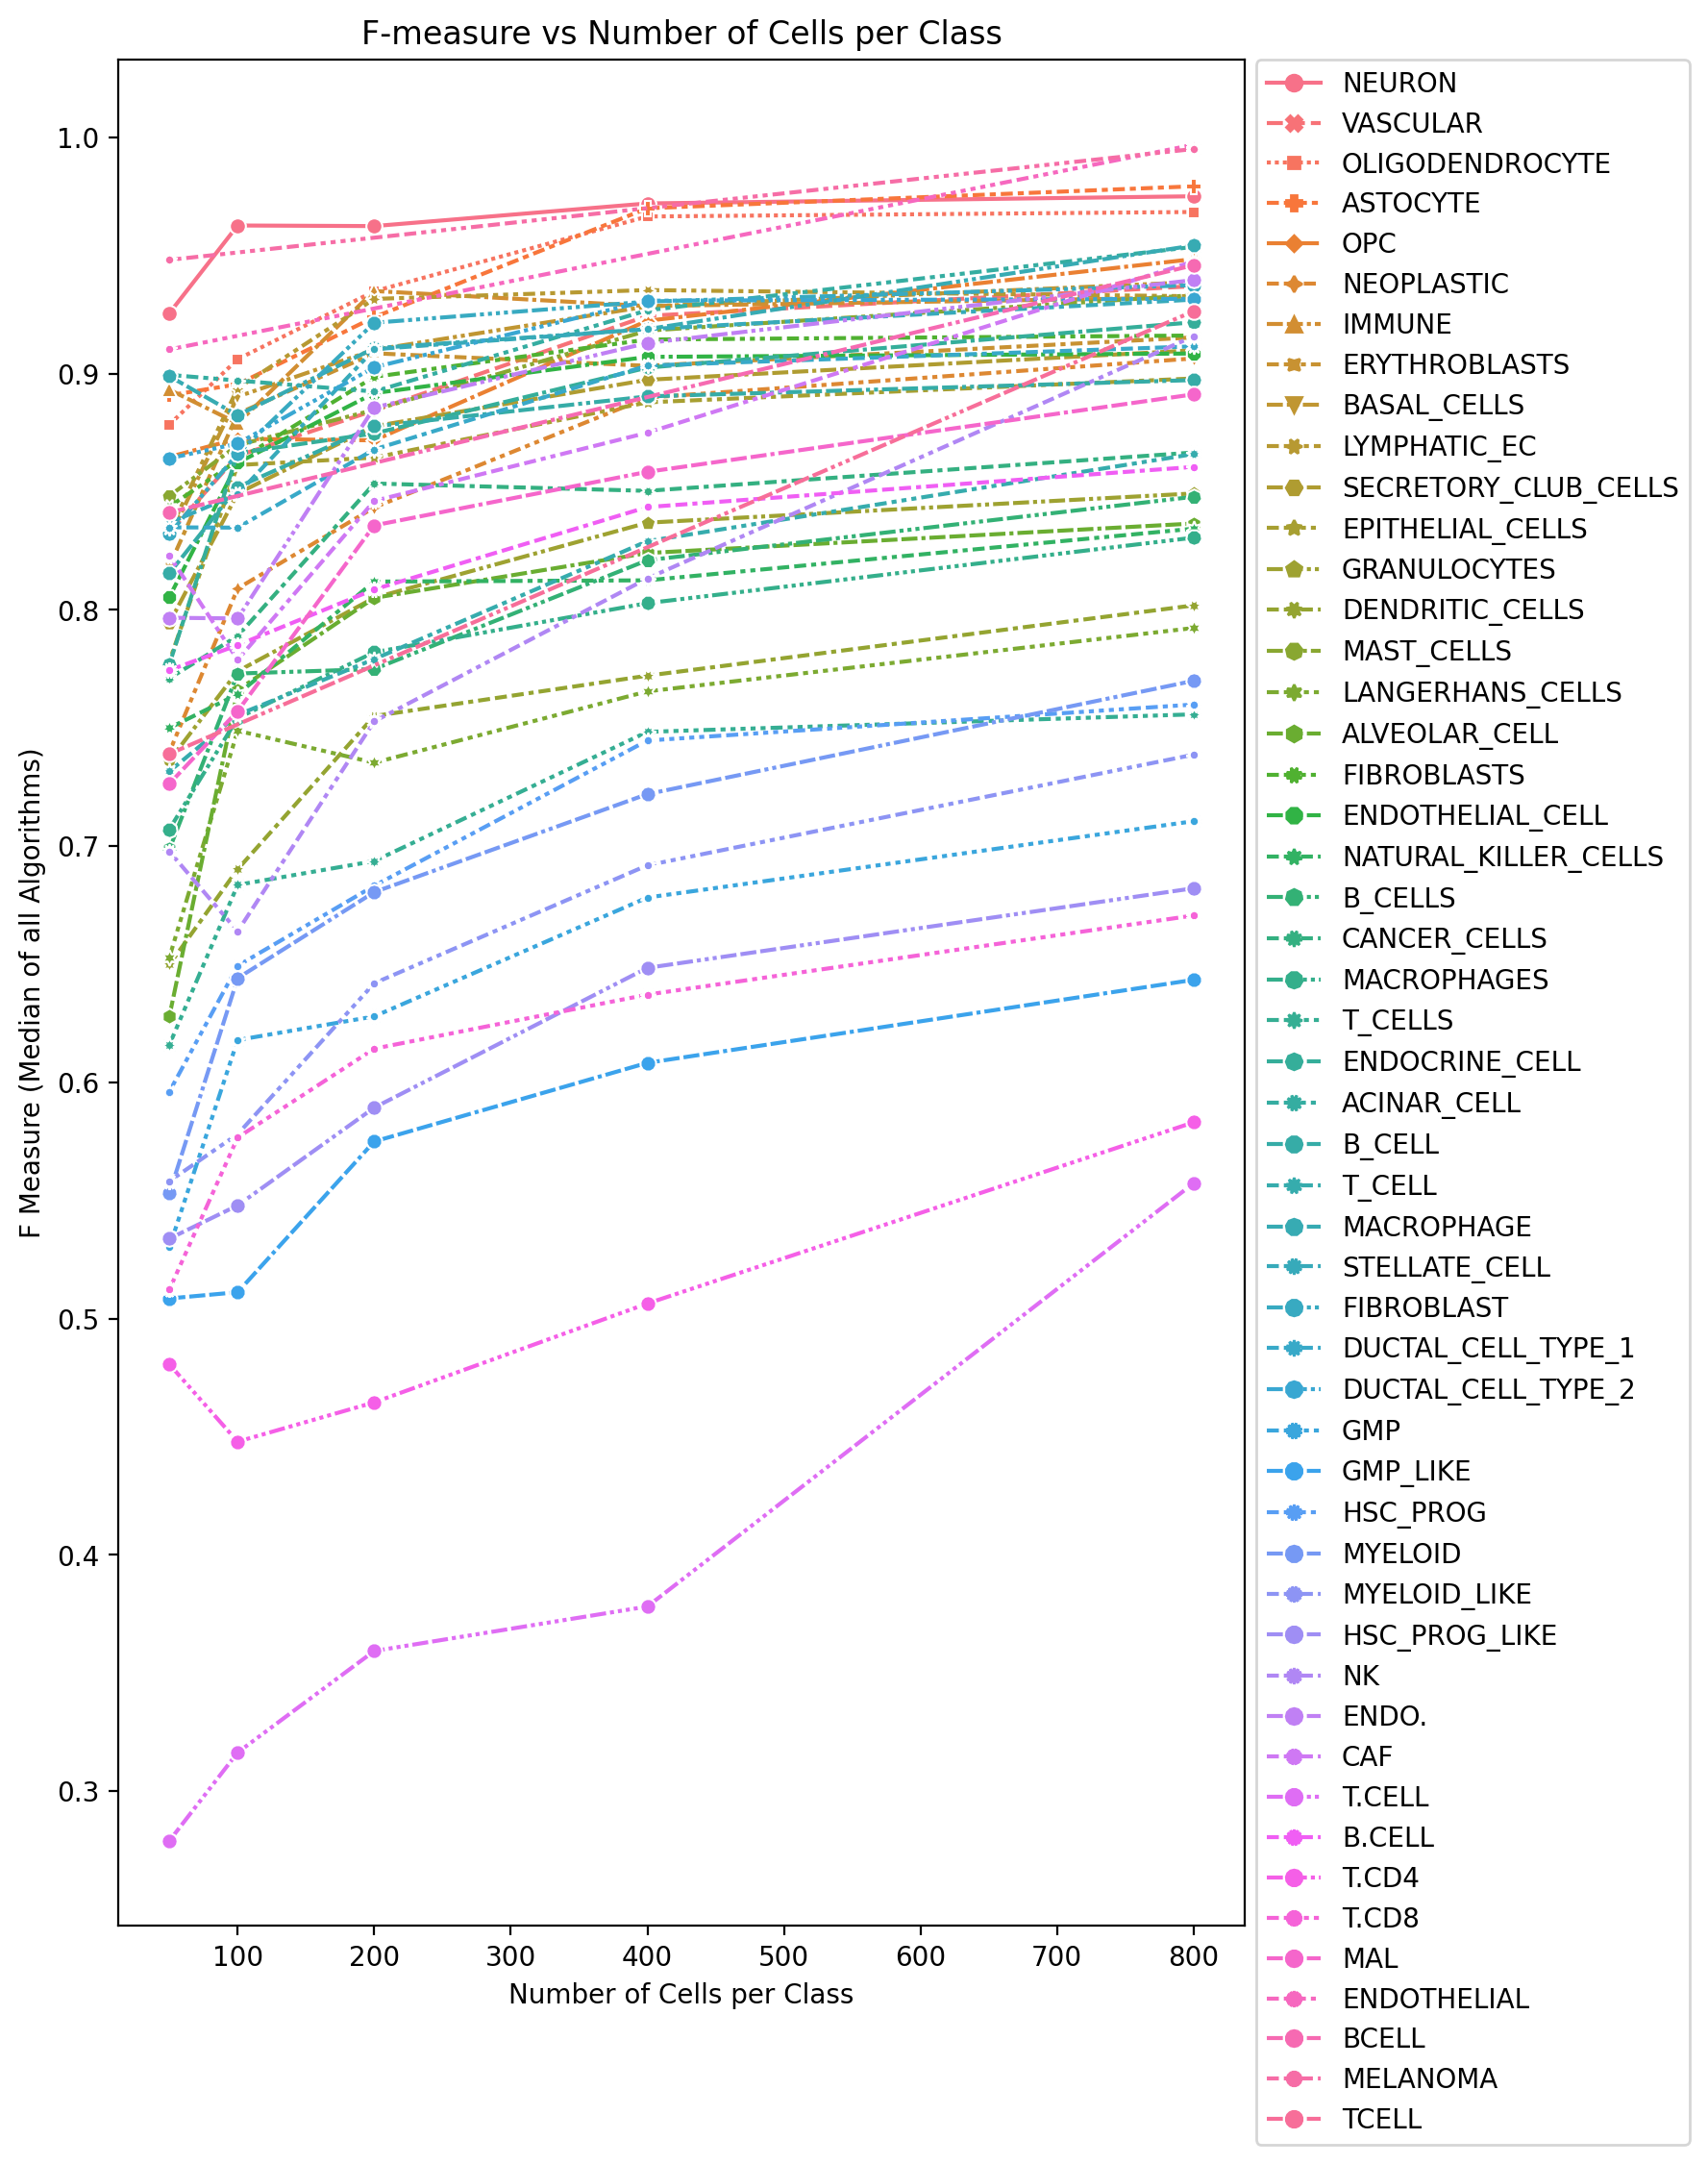

In [10]:
from os import listdir
input_files = listdir('./subsampling_all_cells/performance')
subsamples = {}
all_subsamples = pd.DataFrame()

for file in input_files:
    #only operate on tsv files
    if file[-4:] != '.tsv':
        continue 
    if "1600" in file:
        continue
    file = "./subsampling_all_cells/performance/"+file
    print(file)
    
    # store the data according to the number of cells
    num_cells = file.split('_')[2]
    subsamples[num_cells] = pd.read_csv(file, sep='\t').drop(columns='sorting')
    all_subsamples = all_subsamples.append(subsamples[num_cells],ignore_index=True)

display(all_subsamples)
fig, lax = plt.subplots(1,1,dpi=200)
#display(tempdf)
lnplt = sns.lineplot(y='f1_score',
                     x='support',
                     hue='class',
                     data=all_subsamples, 
                     style="class",
                     markers=True,
                     ci=None,
                     ax=lax
                    )
#lnplt.set_ylim(0.65,1.0)
lnplt.set_ylabel('F Measure (Median of all Algorithms)')
lnplt.set_xlabel('Number of Cells per Class')
lnplt.set_title("F-measure vs Number of Cells per Class")
lnplt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

fig.set_figheight(12)
fig.set_figwidth(9)
fig.tight_layout()
plt.savefig('./supplemental/imbalance_numcells_vs_f1_lineplot.png', bbox_inches='tight')
plt.show()

# Making Heatmaps

In [34]:
make_heatmap('Rdata_seurat/Homogeneity_bootstrapping.tsv', 'supplemental/Figure_s2/homogeneity_heatmap.png', "Mean Homogeneity", 'homogeneity_mean')

FileNotFoundError: [Errno 2] No such file or directory: 'Rdata_seurat/Homogeneity_bootstrapping.tsv'

In [ ]:
make_heatmap('Rdata_seurat/ARI_bootstrapping.tsv', 'supplemental/Figure_s2/ari_heatmap.png', "Mean ARI", 'ARI')

In [ ]:
make_heatmap('Rdata_seurat/percentage_correctly_assigned_bootstrap.tsv', 'supplemental/Figure_s2/perc_heatmap.png', "Mean Percentage Correctly Assigned", 'percentage')